In [4]:
#load the required packages
library(car)
library(MASS)
library(stats)
library(sjPlot)
library(tidyverse)
library(lme4)
library(lmerTest)
library(LMERConvenienceFunctions)
library(multcomp)

Loading required package: carData

Install package "strengejacke" from GitHub (`devtools::install_github("strengejacke/strengejacke")`) to load all sj-packages at once!

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::recode() masks car::recode()
✖ dplyr::select() masks MASS::select()
✖ purrr::some()   masks car::some()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘lmerTest’


The followin

In [1]:
#VALUEdata=read.csv(choose.files())
FIdata=read.csv("raw_data/FI.csv", sep=",")
FIdata$FI <- as.numeric(as.character(FIdata$FI))

print(head(FIdata))

  Treatment         FI Trial
1  A00flg20  3976.8920   One
2  A00flg20  3096.6990   One
3  A00flg20  1615.1370   One
4  A00flg20  8009.6720   One
5     FIC01   517.3474   One
6     FIC01 23398.5300   One


[1] 632 630

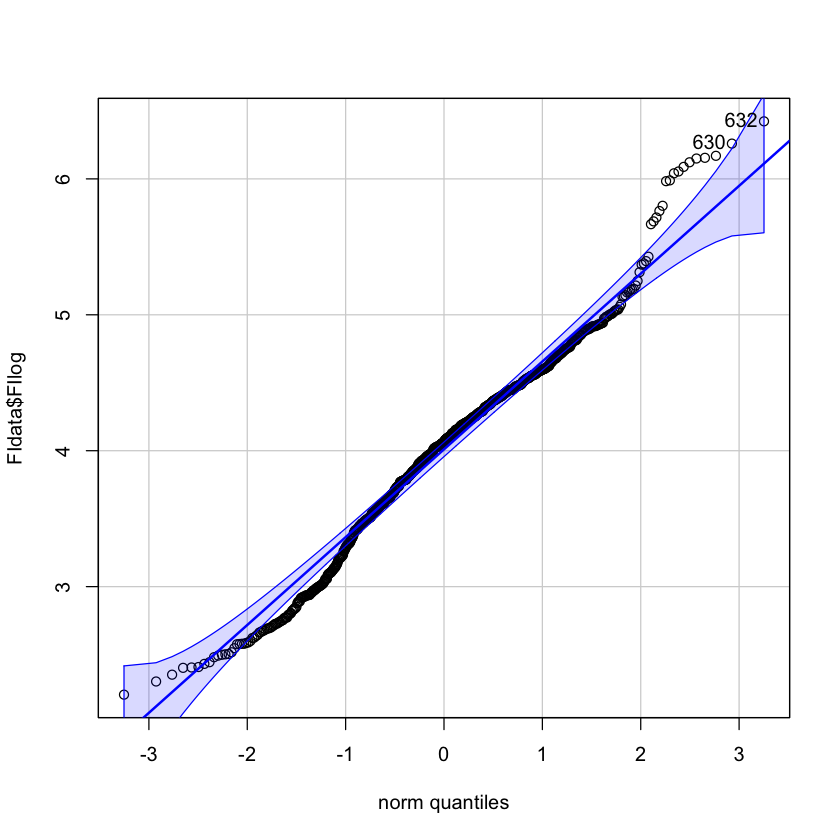

In [5]:
# Q-Q Plot for normality check
FIdata$FIlog <- log10(FIdata$FI)
qqp(FIdata$FIlog, "norm")

Warning message:
“Model was not fitted by REML. Re-fitting model using REML, but p-values, df, etc. still might be unreliable.”


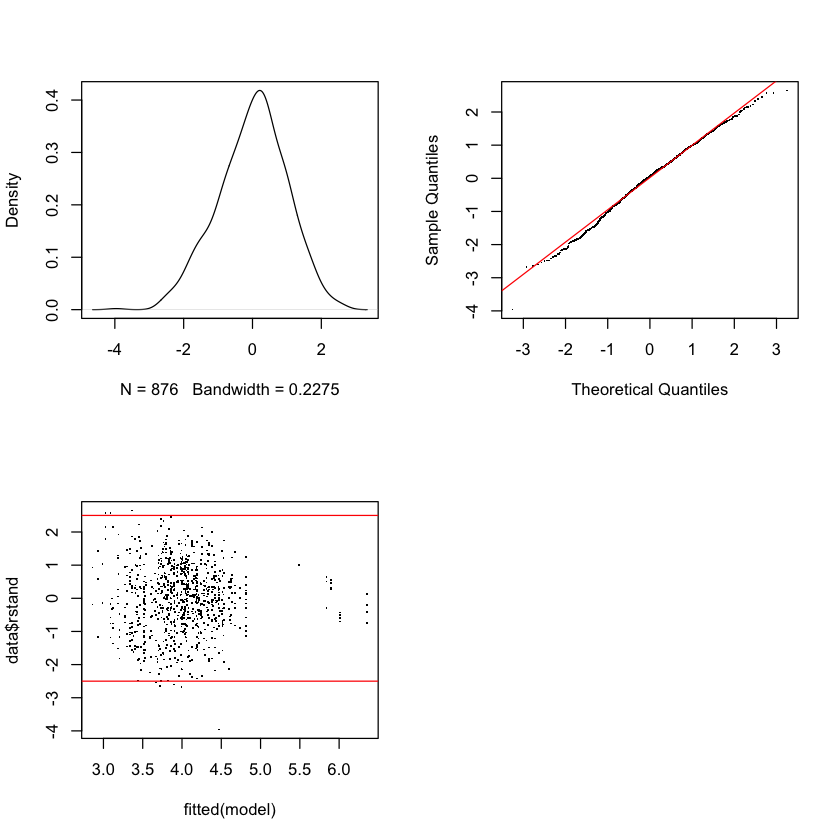

In [6]:
#first fit a linear mixed model, with Trial as the random effect
names(FIdata)[1] <- "Treatment"

#set REML to FALSE if the data is normal, so we can use the maximum likelihood because the data are normal, we have similar sample sizes between effects, and we only have one random effect
FIlog.lmm<-lmer(FIlog ~ Treatment + (1|Trial), data = FIdata, REML = FALSE)
m2<-lmer(FIlog ~ Treatment + (1|Trial), data = FIdata, REML = FALSE)
tab_model(m2, p.val = "kr", show.df = TRUE)

#the density plot should look roughly normal, centered on 0. In the quantile plot the black dots should roughly mirror the red line. And in the fitted residual plot most black dots should be between the red lines, with no obvious skew from left to right.
mcp.fnc(FIlog.lmm)

In [7]:
#If the above looks good, then we can get the model characteristics
summary(FIlog.lmm)


Correlation matrix not shown by default, as p = 86 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: FIlog ~ Treatment + (1 | Trial)
   Data: FIdata

     AIC      BIC   logLik deviance df.resid 
  1460.6   1880.8   -642.3   1284.6      788 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9537 -0.6317  0.0674  0.6783  2.6446 

Random effects:
 Groups   Name        Variance Std.Dev.
 Trial    (Intercept) 0.08043  0.2836  
 Residual             0.24797  0.4980  
Number of obs: 876, groups:  Trial, 5

Fixed effects:
                 Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)      3.838754   0.163936  12.350427  23.416 1.32e-11 ***
TreatmentFIC01  -0.317355   0.191527 873.889714  -1.657 0.097885 .  
TreatmentFIC02   0.122192   0.185487 873.753512   0.659 0.510221    
TreatmentFIC03   0.107962   0.163257 875.978805   0.661 0.508592    
TreatmentFIC04   0.361514   0.162796 875.764617   2.221 0.026630 *  
TreatmentFIC05  -0.201186   0.191917 874.

In [8]:
#anova analysis of lmm
aovlog <- anova(m2)
summary(aovlog)

     Sum Sq         Mean Sq         NumDF        DenDF          F value     
 Min.   :133.5   Min.   :1.57   Min.   :85   Min.   :854.5   Min.   :6.332  
 1st Qu.:133.5   1st Qu.:1.57   1st Qu.:85   1st Qu.:854.5   1st Qu.:6.332  
 Median :133.5   Median :1.57   Median :85   Median :854.5   Median :6.332  
 Mean   :133.5   Mean   :1.57   Mean   :85   Mean   :854.5   Mean   :6.332  
 3rd Qu.:133.5   3rd Qu.:1.57   3rd Qu.:85   3rd Qu.:854.5   3rd Qu.:6.332  
 Max.   :133.5   Max.   :1.57   Max.   :85   Max.   :854.5   Max.   :6.332  
     Pr(>F)        
 Min.   :9.98e-49  
 1st Qu.:9.98e-49  
 Median :9.98e-49  
 Mean   :9.98e-49  
 3rd Qu.:9.98e-49  
 Max.   :9.98e-49  

In [9]:
#Tukey's post-hoc, load library multcomp
multcompsm2 <- glht(m2, linfct = mcp(Treatment = "Tukey"))
# Perform summary on the glht object and store the result
summary_multcompsm2 <- summary(multcompsm2, test = adjusted("none"))
# Extract necessary information from the summary object
coefficients <- summary_multcompsm2$test$coefficients
p_values <- summary_multcompsm2$test$pvalues
# Combine coefficients and p-values into a data frame for easy viewing
result <- data.frame(Coefficients = coefficients, P_values = p_values)
# Display the first few rows of the result
print(head(result))

                 Coefficients   P_values
FIC01 - A00flg20  -0.31735465 0.09752586
FIC02 - A00flg20   0.12219207 0.51004735
FIC03 - A00flg20   0.10796227 0.50841774
FIC04 - A00flg20   0.36151408 0.02637436
FIC05 - A00flg20  -0.20118602 0.29450281
FIC06 - A00flg20   0.06456821 0.70306467


In [10]:
#Therefore the main effect Estimate called (Intercept) is the value for flg20, and if you are looking for treatments that out perform flg22 you should look for Estimates >0, in this case f19 but not significantly
FIdata$residuals <- residuals(m2)
#This makes new column contains residual differences
names(FIdata)[1] <- paste("Chemical")
str(FIdata)

'data.frame':	876 obs. of  5 variables:
 $ Chemical : chr  "A00flg20" "A00flg20" "A00flg20" "A00flg20" ...
 $ FI       : num  3977 3097 1615 8010 517 ...
 $ Trial    : chr  "One" "One" "One" "One" ...
 $ FIlog    : num  3.6 3.49 3.21 3.9 2.71 ...
 $ residuals: num  0.1922 0.0836 -0.1991 0.4963 -0.3762 ...


In [19]:
# Remove "Treatment" from row names
rownames(fixed_effects) <- gsub("^Treatment", "", rownames(fixed_effects))

# Convert to a data frame
FI_LMM_report <- as.data.frame(fixed_effects) %>%
  rownames_to_column(var = "Treatment") %>%
  mutate(LMM_value = case_when(
    Treatment == "flg20" ~ 10^Estimate,
    TRUE ~ 10^(Estimate + first(Estimate[Treatment == "flg20"]))
  )) %>%
  arrange(LMM_value) %>%
  select(Treatment, everything())

# View the result
head(FI_LMM_report)

write.csv(FI_LMM_report, "raw_data/FI_LMM_report.csv", row.names = FALSE)

,Treatment,Estimate,Std. Error,df,t value,Pr(>|t|),LMM_value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,FIC65,-0.6361058,0.1881823,875.9040,-3.380263,0.0007561785,1594.587
2,FIC41,-0.5446518,0.2080991,874.8238,-2.617271,0.0090166236,1968.349
3,FIC46,-0.4789907,0.1922648,874.9585,-2.491308,0.0129116734,2289.619
4,FIC69,-0.4569647,0.1881823,875.9040,-2.428308,0.0153698640,2408.736
5,FIC08,-0.4188563,0.1779312,875.8745,-2.354035,0.0187908834,2629.648
6,FIC54,-0.3930032,0.1831214,875.8058,-2.146135,0.0321364024,2790.942


In [20]:
# Select and transpose the data
FI_LMM_wide <- FI_LMM_report %>%
  select(Treatment, LMM_value) %>%
  t() %>%
  as.data.frame()

# Assign the first row as column names
colnames(FI_LMM_wide) <- unlist(FI_LMM_wide[1, ])
FI_LMM_wide <- FI_LMM_wide[-1, ]  # Remove the first row after assigning column names

head(FI_LMM_wide)

write.csv(FI_LMM_wide, "raw_data/FI_LMM_wide.csv", row.names = FALSE)

,FIC65,FIC41,FIC46,FIC69,FIC08,FIC54,FIC15,FIC64,FIC01,FIC45,⋯,FIC44,FIC09,FIC82,FIC29,FIC57,FIC13,FIC24,FIC21,FIC22,flg22
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
LMM_value,1594.587,1968.349,2289.619,2408.736,2629.648,2790.942,2875.003,3034.833,3321.998,3441.881,⋯,21594.742,23542.806,23677.529,23774.733,25327.319,28563.522,33324.553,35856.616,38998.218,828843.997
